# Big Data Mart Sales Problem

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [20]:
train_data= pd.read_csv('bigdatamart_Train.csv')
test_data=pd.read_csv('bigdatamart_Test.csv')

In [21]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
test_data.shape

(5681, 11)

In [23]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [24]:
test_data['Item_Outlet_Sales']=np.nan
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [25]:
bigdata=pd.concat([train_data,test_data])

In [26]:
bigdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
bigdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [28]:
bigdata.shape

(14204, 12)

<AxesSubplot:>

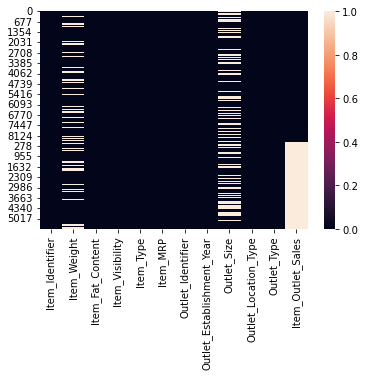

In [29]:
sns.heatmap(bigdata.isnull())

In [30]:
bigdata.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [31]:
bigdata["Item_Weight"].fillna(bigdata["Item_Weight"].mean(),inplace=True)

In [32]:
bigdata["Item_Weight"].isnull().sum()

0

In [33]:
bigdata['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [34]:
bigdata['Outlet_Size']=bigdata['Outlet_Size'].fillna('Small')

In [35]:
bigdata['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [36]:
bigdata['Item_Outlet_Sales'].fillna(bigdata['Item_Outlet_Sales'].mean(),inplace=True)

In [37]:
bigdata.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [38]:
bigdata['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [39]:
bigdata['Item_Fat_Content'].replace('reg','Regular',inplace=True)
bigdata['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
bigdata['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)

In [40]:
bigdata['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [41]:
bigdata['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [42]:
bigdata['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [43]:
bigdata['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [44]:
bigdata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1321.864430
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,1468.089000
50%,12.792854,0.054021,142.247000,1999.000000,2181.288914
75%,16.000000,0.094037,185.855600,2004.000000,2181.288914
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [45]:
bigdata.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier']
for i in col:
    bigdata[i]=le.fit_transform(bigdata[i])
bigdata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.138000
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.422800
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.270000
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.380000
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,233,10.50,1,0.013496,13,141.3154,8,1997,2,0,1,2181.288914
5677,308,7.60,1,0.142991,15,169.1448,3,2009,1,2,2,2181.288914
5678,1426,10.00,0,0.073529,8,118.7440,7,2002,2,1,1,2181.288914
5679,521,15.30,1,0.000000,3,214.6218,2,2007,2,1,1,2181.288914


In [47]:
train_data= bigdata

In [48]:
test_data=bigdata.drop(['Item_Outlet_Sales'],axis=1)

In [49]:
train_data.skew()

Item_Identifier             -0.004897
Item_Weight                  0.111314
Item_Fat_Content             0.613645
Item_Visibility              1.195175
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year   -0.396465
Outlet_Size                 -0.861786
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            1.520025
dtype: float64

Item_Identifier                  AxesSubplot(0.125,0.71587;0.227941x0.16413)
Item_Weight                   AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Item_Fat_Content              AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Item_Visibility                 AxesSubplot(0.125,0.518913;0.227941x0.16413)
Item_Type                    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Item_MRP                     AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Outlet_Identifier               AxesSubplot(0.125,0.321957;0.227941x0.16413)
Outlet_Establishment_Year    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Outlet_Size                  AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Outlet_Location_Type               AxesSubplot(0.125,0.125;0.227941x0.16413)
Outlet_Type                     AxesSubplot(0.398529,0.125;0.227941x0.16413)
Item_Outlet_Sales               AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

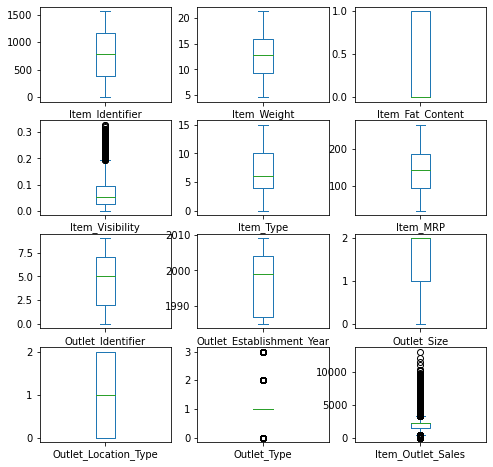

In [50]:
train_data.plot(kind='box',subplots=True,figsize=(8,8),layout=(4,3))

In [51]:
from scipy.stats import zscore
z = np.abs(zscore(train_data))
z

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1.388320,0.824939,0.739212,0.969852,0.766467,1.752511,1.507764,0.139681,0.664115,1.369286,0.252702,1.175539e+00
1,1.717498,1.623224,1.352792,0.907063,1.606957,1.493696,0.607145,1.334228,0.664115,1.091566,1.002766,1.314755e+00
2,0.262885,1.111729,0.739212,0.956000,0.657587,0.009874,1.507764,0.139681,0.664115,1.369286,0.252702,6.356315e-02
3,0.758014,1.513233,1.352792,1.281712,0.291782,0.661838,1.664600,0.020226,0.799968,1.091566,1.508171,1.096149e+00
4,1.149470,0.912325,0.739212,1.281712,0.420245,1.403623,1.312115,1.293777,2.128198,1.091566,0.252702,8.976908e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1.217058,0.541524,1.352792,1.019425,1.369614,0.005000,1.155279,0.099229,0.799968,1.369286,0.252702,1.720159e-15
5677,1.050244,1.226443,1.352792,1.497142,1.844299,0.453249,0.607145,1.334228,0.664115,1.091566,1.002766,1.720159e-15
5678,1.436389,0.659613,0.739212,0.147226,0.182903,0.358558,0.802794,0.498045,0.799968,0.138860,0.252702,1.720159e-15
5679,0.576494,0.592135,1.352792,1.281712,1.003809,1.185747,0.959630,1.095319,0.799968,0.138860,0.252702,1.720159e-15


In [52]:
Train_data=train_data[(z<3).all(axis=1)]

In [53]:
Train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.138000
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.422800
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.270000
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.380000
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,233,10.50,1,0.013496,13,141.3154,8,1997,2,0,1,2181.288914
5677,308,7.60,1,0.142991,15,169.1448,3,2009,1,2,2,2181.288914
5678,1426,10.00,0,0.073529,8,118.7440,7,2002,2,1,1,2181.288914
5679,521,15.30,1,0.000000,3,214.6218,2,2007,2,1,1,2181.288914


In [54]:
train_data.shape

(14204, 12)

In [55]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif['Variables']=x1.columns
    vif['vif Factor']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [57]:
calc_vif(Train_data)

,Variables,vif Factor
0,Item_Identifier,4.079500
1,Item_Weight,10.046343
2,Item_Fat_Content,1.604851
3,Item_Visibility,2.905385
4,Item_Type,4.052091
5,Item_MRP,7.763090
6,Outlet_Identifier,15.613504
7,Outlet_Establishment_Year,58.377711
8,Outlet_Size,7.617264
9,Outlet_Location_Type,15.367161


In [58]:
Train_data= Train_data.drop(['Outlet_Establishment_Year'], axis=1)

In [59]:
Train_data.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.048150,-0.114553,-0.042372,-0.010105,0.012817,-0.002055,0.003700,-0.003171,-0.006771,0.003889
Item_Weight,0.048150,1.000000,-0.029906,-0.011740,0.029949,0.032879,0.001369,0.000034,-0.001431,-0.000235,0.008269
Item_Fat_Content,-0.114553,-0.029906,1.000000,0.041864,-0.149280,-0.003504,0.001256,-0.002974,0.001633,0.003614,0.020431
Item_Visibility,-0.042372,-0.011740,0.041864,1.000000,-0.038119,-0.000449,-0.073978,0.061280,-0.003052,-0.106271,-0.072211
Item_Type,-0.010105,0.029949,-0.149280,-0.038119,1.000000,0.044811,-0.000571,-0.001493,0.002652,0.002640,0.014452
Item_MRP,0.012817,0.032879,-0.003504,-0.000449,0.044811,1.000000,-0.004342,0.006120,-0.006924,-0.023219,0.425958
Outlet_Identifier,-0.002055,0.001369,0.001256,-0.073978,-0.000571,-0.004342,1.000000,0.272846,-0.724998,0.086854,0.133298
Outlet_Size,0.003700,0.000034,-0.002974,0.061280,-0.001493,0.006120,0.272846,1.000000,-0.481658,-0.391759,-0.114909
Outlet_Location_Type,-0.003171,-0.001431,0.001633,-0.003052,0.002652,-0.006924,-0.724998,-0.481658,1.000000,0.465095,0.040892
Outlet_Type,-0.006771,-0.000235,0.003614,-0.106271,0.002640,-0.023219,0.086854,-0.391759,0.465095,1.000000,0.272697


In [60]:
Train_data.shape

(13780, 11)

<AxesSubplot:>

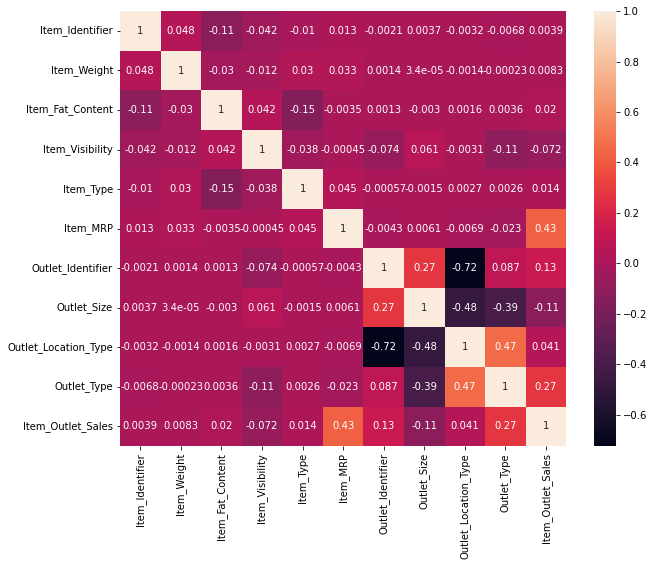

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(Train_data.corr(),annot=True)

In [62]:
x=Train_data.drop(["Item_Outlet_Sales"], axis=1)

In [63]:
y=Train_data["Item_Outlet_Sales"]

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [65]:
le=LinearRegression()
r2=0
mse=0
score=0
for i in range(5000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    le.fit(x_train,y_train)
    predle=le.predict(x_test)
    scores=le.score(x_train,y_train)
    r2s=r2_score(y_test,predle)
    mses=mean_squared_error(y_test,predle)
    if scores>score:
        score=scores
        r2=r2s
        mse=mses
print(f"The max score is {score} at random state {i} where the r2socre is {r2s} and mse is {mse}")

The max score is 0.2886947142244204 at random state 4999 where the r2socre is 0.273067159946748 and mse is 955168.6904614293


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4999)

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [68]:
models=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),LinearRegression()]
for m in models:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(f"score of {m}:",score)
    print(f"r2 score of {m}:",r2_score(y_test,predm))
    print(f"mean squared error of {m}:",mean_squared_error(y_test,predm))
    print("\n")

score of RandomForestRegressor(): 0.8959799427229629
r2 score of RandomForestRegressor(): 0.2365749083681944
mean squared error of RandomForestRegressor(): 968473.8360918063


score of AdaBoostRegressor(): 0.26802140214098535
r2 score of AdaBoostRegressor(): 0.2715830524781394
mean squared error of AdaBoostRegressor(): 924062.8362540316


score of GradientBoostingRegressor(): 0.37516113611276924
r2 score of GradientBoostingRegressor(): 0.33352230949174144
mean squared error of GradientBoostingRegressor(): 845487.2818189273


score of LinearRegression(): 0.27864212444261505
r2 score of LinearRegression(): 0.273067159946748
mean squared error of LinearRegression(): 922180.111584577




In [ ]:
from sklearn.model_selection import cross_val_score
for m in models:
    cvscore=cross_val_score(m,x,y,cv=8)
    print(f"cv socre mean {m}:",cvscore.mean())

cv socre mean RandomForestRegressor(): -3.2717197027862585e+29
cv socre mean AdaBoostRegressor(): -3.27503917178856e+29


In [79]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Score:",lr.score(x_train,y_train))
print("r2 Score",r2_score(y_test,predlr))
print("mse:",mean_squared_error(y_test,predlr))


Score: 0.27864212444261505
r2 Score 0.273067159946748
mse: 922180.111584577


In [80]:
from sklearn.model_selection import GridSearchCV
dict={'fit_intercept':[False,True],'normalize':[True,False],'n_jobs':[1,5,10,15,50,100,1000],'positive':[True,False]}
grid=GridSearchCV(lr,param_grid=dict,cv=5)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.27577535692773136
LinearRegression(n_jobs=1, normalize=True)
{'fit_intercept': True, 'n_jobs': 1, 'normalize': True, 'positive': False}


In [81]:
best_model=LinearRegression(fit_intercept=False,n_jobs=1,normalize=True,positive=False)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
score=best_model.score(x_train,y_train)
print('score',score)
print('r2 score',r2_score(y_test,pred))
print('mse:',mean_squared_error(y_test,pred))

score 0.27393601361318676
r2 score 0.2688229376141189
mse: 927564.2918122951


In [82]:
import joblib
joblib.dump(best_model,'bigdata.obj')

['bigdata.obj']